In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
# Read the training dataset into a Pandas DataFrame
train_df = pd.read_csv('train.csv')

# Read the test dataset into a Pandas DataFrame
test_df = pd.read_csv('test.csv')

In [6]:
# Uncomment the line below to display the first few rows of the training dataset
#train_df.head()

# Display a random sample of 5 rows from the training dataset
train_df.sample(n=5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price
1508,a710172032669867487,One stop from Manhattan - Cozy Two Bedroom,154834539,Kyle,Queens,Long Island City,40.74407,-73.95015,Entire home/apt,2,15,2023-03-01,5.42,1,69,15,NaN,199
5218,a1386742,Columbus Circle/Central Park/Hells Kitchen,40100,Nicole,Manhattan,Hell's Kitchen,40.76828,-73.98783,Private room,3,323,2023-01-31,3.44,1,0,29,NaN,93
3373,a49649623,Charming boutique apt 15 min from Manhattan,132178349,Francis,Queens,Astoria,40.75771,-73.92666,Entire home/apt,6,28,2023-01-26,1.52,1,13,19,NaN,117
10044,a724024519666026412,Clinton Hill- 3 bedroom/2 bath Flat.,99629743,Leatha,Brooklyn,Clinton Hill,40.68687,-73.96463,Entire home/apt,2,13,2023-02-05,2.64,1,313,13,NaN,399
2613,a3207986,"Modern loft in Cobble Hill, BK",1874429,Lisa,Brooklyn,Carroll Gardens,40.68470,-73.99110,Private room,2,138,2023-03-05,1.34,1,103,14,NaN,125


In [8]:
# One-hot encoding for 'neighbourhood_group' in the training dataset
neighbourhood_group_encoding_train = pd.get_dummies(train_df['neighbourhood_group'])
train_df = train_df.join(neighbourhood_group_encoding_train)

# One-hot encoding for 'neighbourhood_group' in the test dataset
neighbourhood_group_encoding_test = pd.get_dummies(test_df['neighbourhood_group'])
test_df = test_df.join(neighbourhood_group_encoding_test)

# One-hot encoding for 'room_type' in the training dataset
room_type_encoding_train = pd.get_dummies(train_df['room_type'])
train_df = train_df.join(room_type_encoding_train)

# One-hot encoding for 'room_type' in the test dataset
room_type_encoding_test = pd.get_dummies(test_df['room_type'])
test_df = test_df.join(room_type_encoding_test)

In [ ]:
# Display the column names of the training dataset
train_df_columns = train_df.columns
print(train_df_columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'price', 'Bronx', 'Brooklyn',
       'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt', 'Hotel room',
       'Private room', 'Shared room'],
      dtype='object')

In [ ]:
# Uncomment the line below to create a scatter plot of 'price' against 'minimum_nights' in the training dataset
#sns.scatterplot(data=train_df, x ="price", y="minimum_nights")

# Uncomment the line below to create a histogram plot for the 'capped_minimum_nights' column in the training dataset
#sns.histplot(train_df['capped_minimum_nights'])

In [ ]:
def cap_outliers(df, col_name):
    # Calculate the upper and lower bounds to cap outliers using the IQR method
    q3 = df[col_name].quantile(0.70)
    q1 = df[col_name].quantile(0.30)
    iqr = q3 - q1
    ll = q1 - (iqr * 1.5)
    ul = q3 + (iqr * 1.5)
    
    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()
    
    # Define the new capped column name
    new_name = 'capped_' + col_name
    
    # Cap outliers by replacing values above the upper limit with the upper limit,
    # values below the lower limit with the lower limit, and others with original values
    df[new_name] = np.where(df[col_name] > ul, ul, np.where(df[col_name] < ll, ll, df[col_name]))

    # Uncomment the lines below if you want to further scale or normalize the capped column
    # df[new_name] = scaler.fit_transform(df[[new_name]])
    # df[new_name] = preprocessing.normalize(np.array(df[[new_name]]))

In [ ]:
# Uncomment the line below to create a new column 'log_price' with the logarithm of 'price' in the training dataset
# train_df['log_price'] = np.log(train_df['price'])

# List of numerical columns to cap outliers
num_columns = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

# Cap outliers for each numerical column in both the training and test datasets
for col in num_columns:
    cap_outliers(train_df, col)
    cap_outliers(test_df, col)

# Calculate the upper and lower bounds to cap outliers for the 'price' column in the training dataset
q3_train = train_df['price'].quantile(0.85)
q1_train = train_df['price'].quantile(0.15)
iqr_train = q3_train - q1_train
ll_train = q1_train - (iqr_train * 1.5)
ul_train = q3_train + (iqr_train * 1.5)

# Define the new capped column name for 'price'
new_name = 'capped_price'

# Cap outliers for the 'price' column by replacing values above the upper limit with the upper limit,
# values below the lower limit with the lower limit, and others with original values
train_df[new_name] = np.where(train_df['price'] > ul_train, ul_train, np.where(train_df['price'] < ll_train, ll_train, train_df['price']))

In [ ]:
# List of capped numerical columns after outlier handling
num_capped_columns = ['capped_price', 'capped_availability_365', 'capped_minimum_nights', 'capped_number_of_reviews',
'capped_reviews_per_month', 'capped_calculated_host_listings_count', 'capped_availability_365',
'capped_number_of_reviews_ltm']


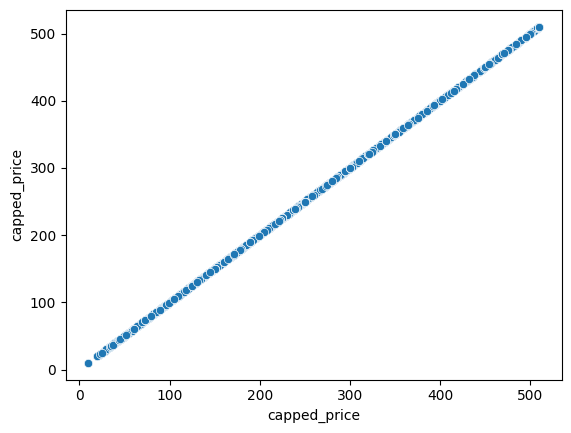

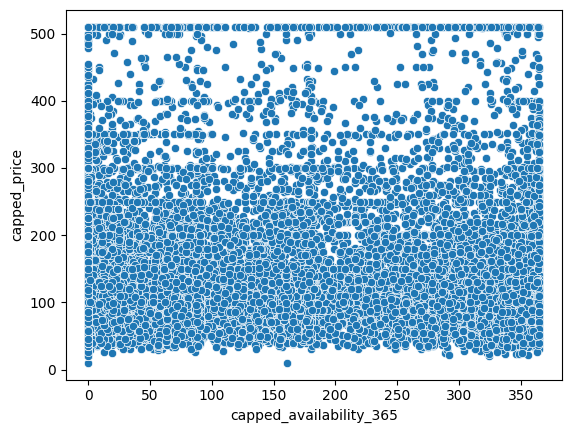

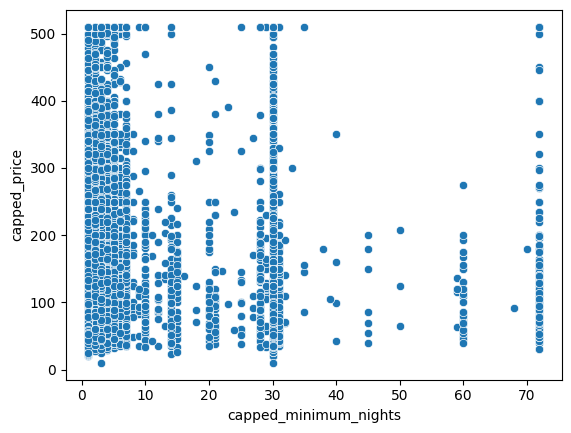

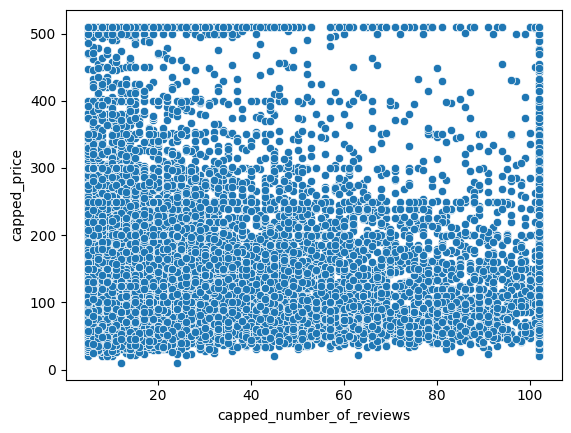

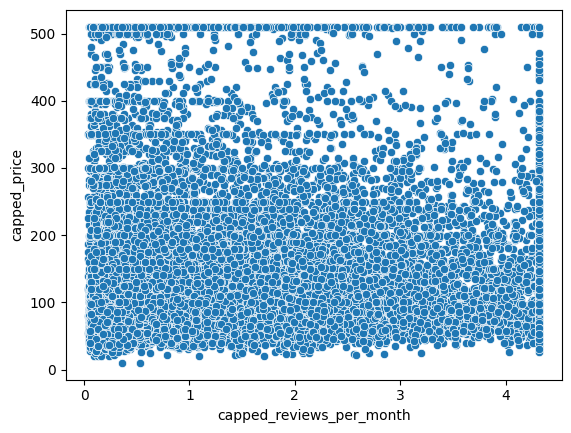

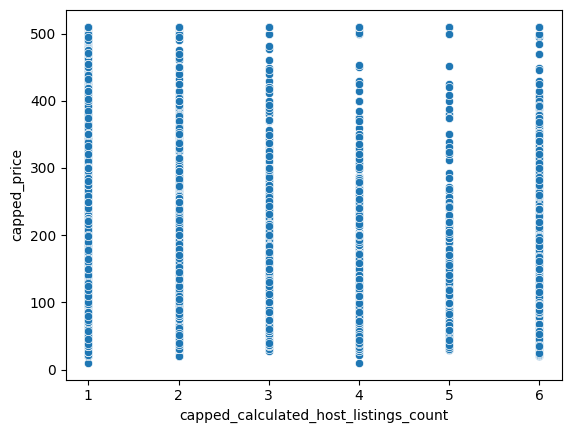

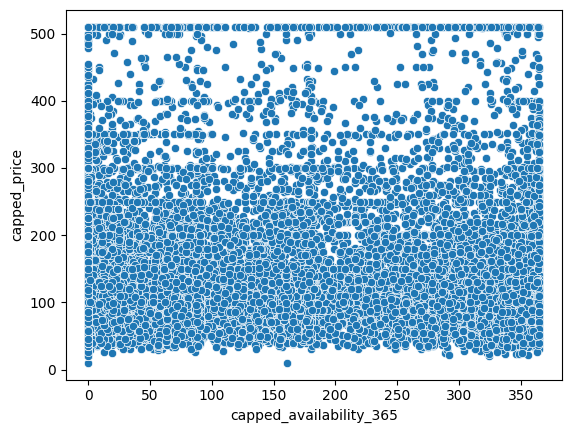

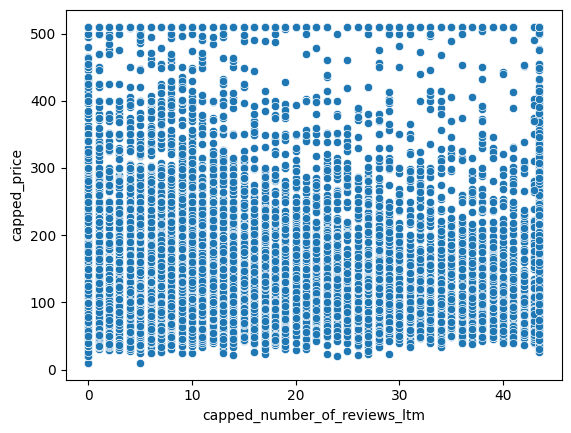

In [ ]:
# Create scatter plots for each capped numerical column against the 'capped_price' column in the training dataset
for i in num_capped_columns:
    plt.figure()
    sns.scatterplot(data=train_df, x=i, y='capped_price')

<Axes: >

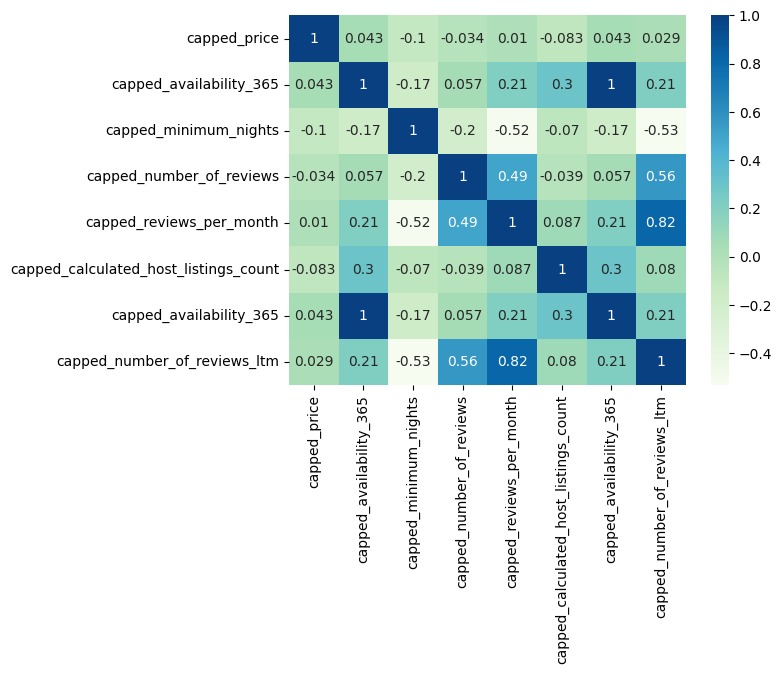

In [ ]:
# Create a heatmap to visualize the correlation matrix of capped numerical columns in the training dataset
sns.heatmap(train_df[num_capped_columns].corr(), annot=True, cmap='GnBu')

In [ ]:
# Define predictor variables (vars) and the target variable (pred)
vars = ['capped_minimum_nights', 'capped_calculated_host_listings_count', 'Bronx', 'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt', 'Private room', 'Shared room', 'Hotel room', 'latitude', 'longitude']
pred = ['capped_price']

# Extract the predictor and target variables from the training dataset
X = train_df[vars]
y = train_df[pred]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize a linear regression model
regr = linear_model.LinearRegression()

# Fit the model to the training data
regr.fit(X_train, y_train)

# Print the R-squared score on the test set to evaluate model performance
print(regr.score(X_test, y_test))

0.31476292032497644


In [ ]:
# Use the trained linear regression model to make predictions on the test set
y_pred = regr.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

# Print the RMSE as a measure of model performance
print(mse)

85.05362120188283


In [ ]:
# Extract predictor variables for the new test dataset
X_test_new = test_df[vars]

# Use the trained linear regression model to make predictions on the new test set
y_pred_new = regr.predict(X_test_new)

In [ ]:
# Create a DataFrame 'results_df' containing the 'id' column from the test dataset
# and the predicted prices ('y_pred_new') flattened into a 1D array
results_df = pd.DataFrame({
    'id': test_df.id,
    'price': y_pred_new.flatten()
})

In [ ]:
# Save the 'results_df' DataFrame to a CSV file named 'results.csv' without including the index
results_df.to_csv('results.csv', index=False)